## <span style='font-family:arial'>Etape 1: Chargement des données</span>



In [1]:
source<-"Data A6.txt"
sp.data<-read.table(source)
sp.ts<-ts(sp.data, start = c(2000, 3),end=c(2021, 3),freq = 12)
print(sp.ts, calender = T)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2000           2190 2132 2357 2413 2463 2422 2358 2352 2549 3375
2001 2109 2052 2327 2231 2470 2526 2483 2518 2316 2409 2638 3542
2002 2114 2109 2366 2300 2569 2486 2568 2595 2297 2401 2601 3488
2003 2121 2046 2273 2333 2576 2433 2611 2660 2461 2641 2660 3654
2004 2293 2219 2398 2553 2685 2643 2867 2622 2618 2727 2763 3801
2005 2219 2316 2530 2640 2709 2783 2924 2791 2784 2801 2933 4137
2006 2424 2519 2753 2791 3017 3055 3117 3024 2997 2913 3137 4269
2007 2569 2603 3005 2867 3262 3364 3322 3292 3057 3087 3297 4403
2008 2675 2806 2989 2997 3420 3279 3517 3472 3151 3351 3386 4461
2009 2913 2781 3024 3130 3467 3307 3555 3399 3263 3425 3356 4625
2010 2878 2916 3214 3310 3467 3438 3657 3454 3365 3497 3524 4681
2011 2888 2984 3249 3363 3471 3551 3740 3576 3517 3515 3646 4892
2012 2995 3202 3550 3409 3786 3816 3733 3752 3503 3626 3869 5124
2013 3143 3212 3603 3464 3916 3776 3994 4056 3588 3741 4007 5147
2014 3333 3261 3596 3643 

### Etape 2: Exploration graphique des données \- Analyse du graphe et de l'arc



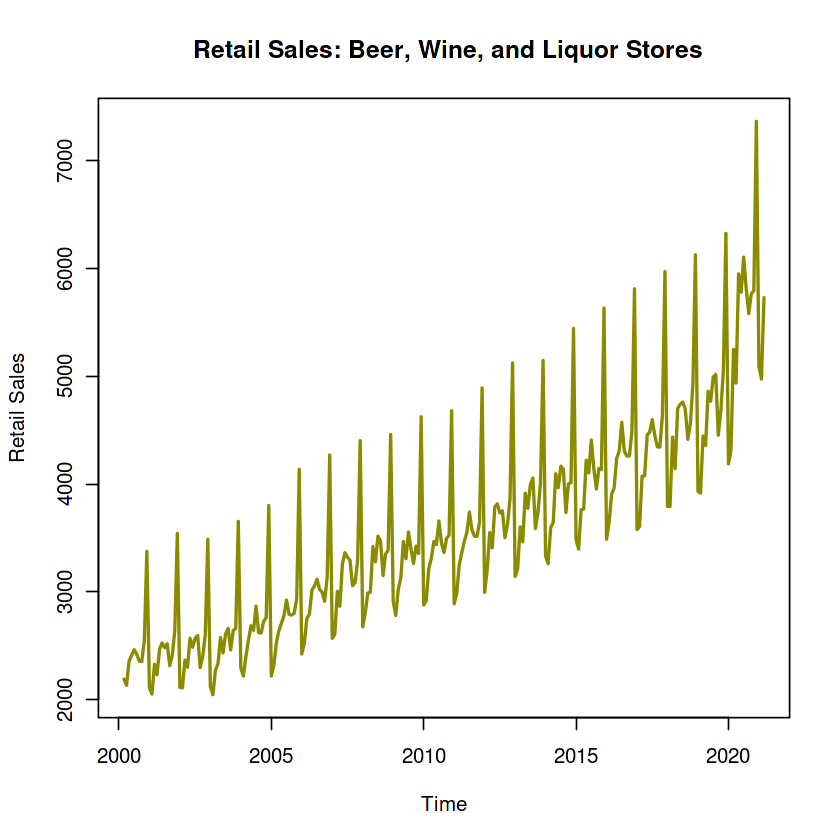

In [2]:
plot(sp.ts, xlab="Time", ylab="Retail Sales",
     main=" Retail Sales: Beer, Wine, and Liquor Stores",
     col="yellow4",lwd=2)

A travers la représentation graphique des données à étudier, on remarque la présence d'une tendance et d'une saisonnalité . Pour s'assurer de ce qu'on a observé, on examine la fonction d'autocorrelation acf.

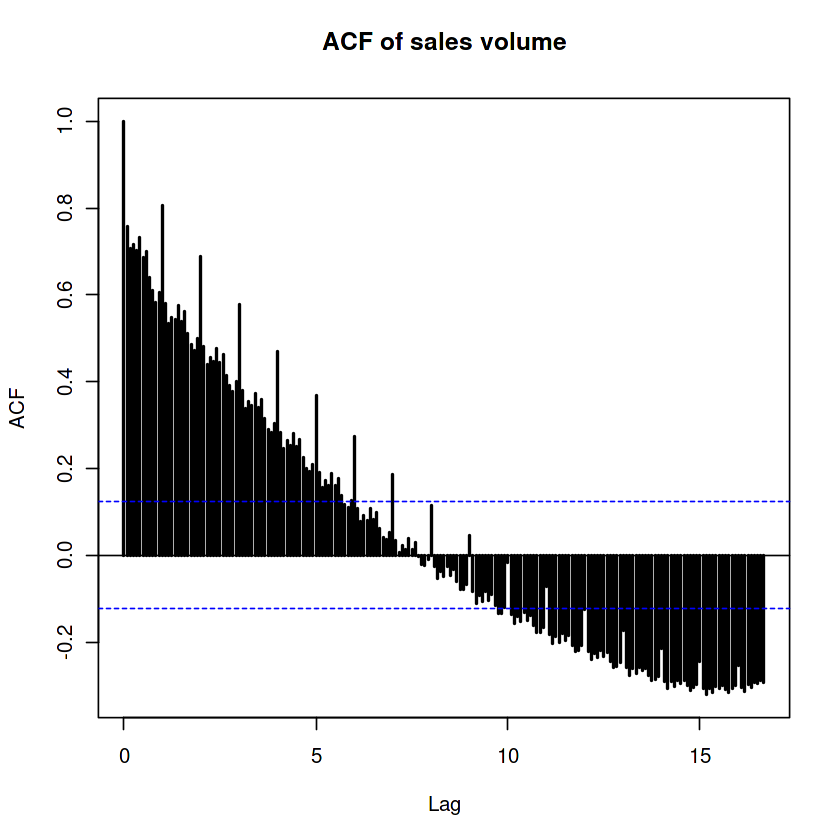

In [3]:
acf(sp.ts,lag=200,main="ACF of sales volume",lwd=2)

L'acf est d'une décroissance lente cequi confirme notre hypothèse de présence de tendance aussi bien l'acf présente un comportement répétitif amorti ce qui nous informe sur la présence d'une saisonnalité.


### Etape 3: Ajustement



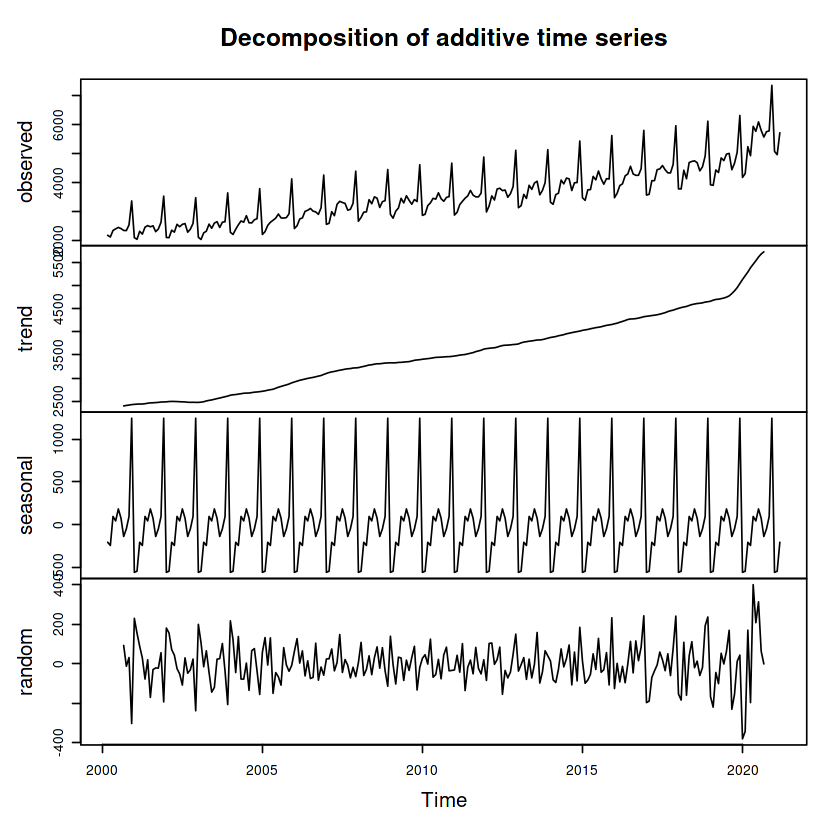

In [15]:
sp.tscomponents <- decompose(sp.ts)
plot(sp.tscomponents)

Justification de l'ajustement additive: le choix de cette décoposition est justifié par le fait que les amplitudes des données sont plus ou moins constantes sinon pour un modèle multiplicatif, nous pouvons appliquer la fonction logarithme sur les données pour réduire leurs variabilités.

Apres avoir detecté le modéle d'ajustement on peut maintenant l'appliquer:


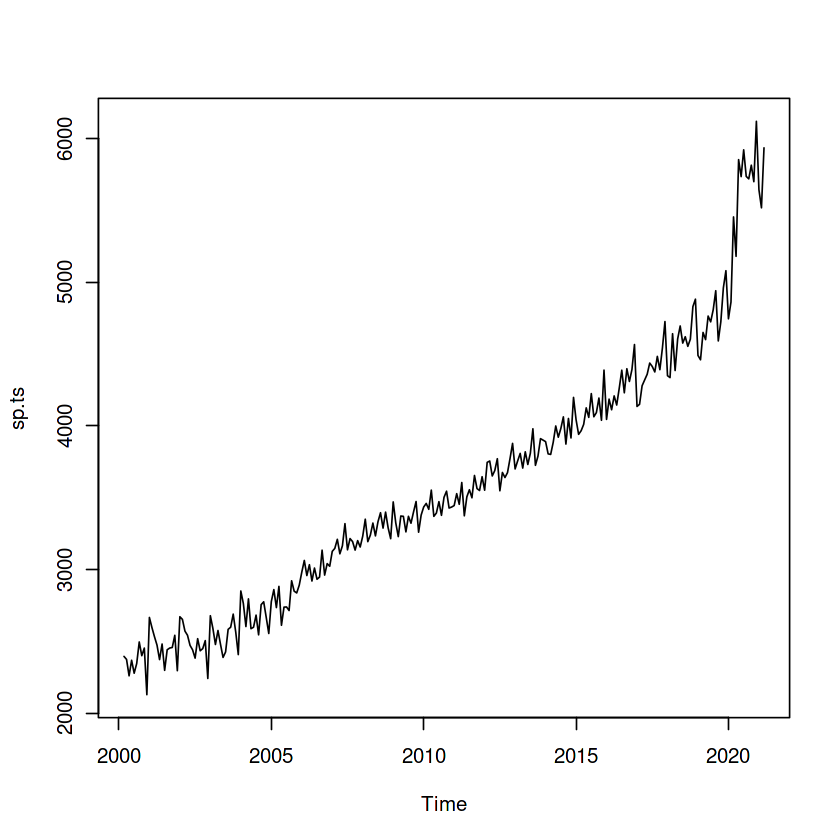

In [5]:
sp.tsAdjusted <- sp.ts - sp.tscomponents$seasonal
plot(sp.tsAdjusted)

### Etape 4: Test de stationarité



Pour pouvoir modéliser les résidus par un modèle ARMA, il faut s'assurer de leur stationnarité. 

Pour ce faire, on utilisera le test de Augmented Dickey Fuller adf.test\(\) sous le package tseries. Si :

La stationnarité est assurée alors :

a. Si les résidus correspondent à un bruit blanc, c'est gagné! *Le modèle est parfait !*

b. Si les résidus ne coresspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA.

La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.


In [6]:
library(tseries)
adf.test(sp.tsAdjusted, alternative="stationary")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Warning message in adf.test(sp.tsAdjusted, alternative = "stationary"):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  sp.tsAdjusted
Dickey-Fuller = -0.097604, Lag order = 6, p-value = 0.99
alternative hypothesis: stationary


La p_value est 0.99 > 0.05 donc La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.


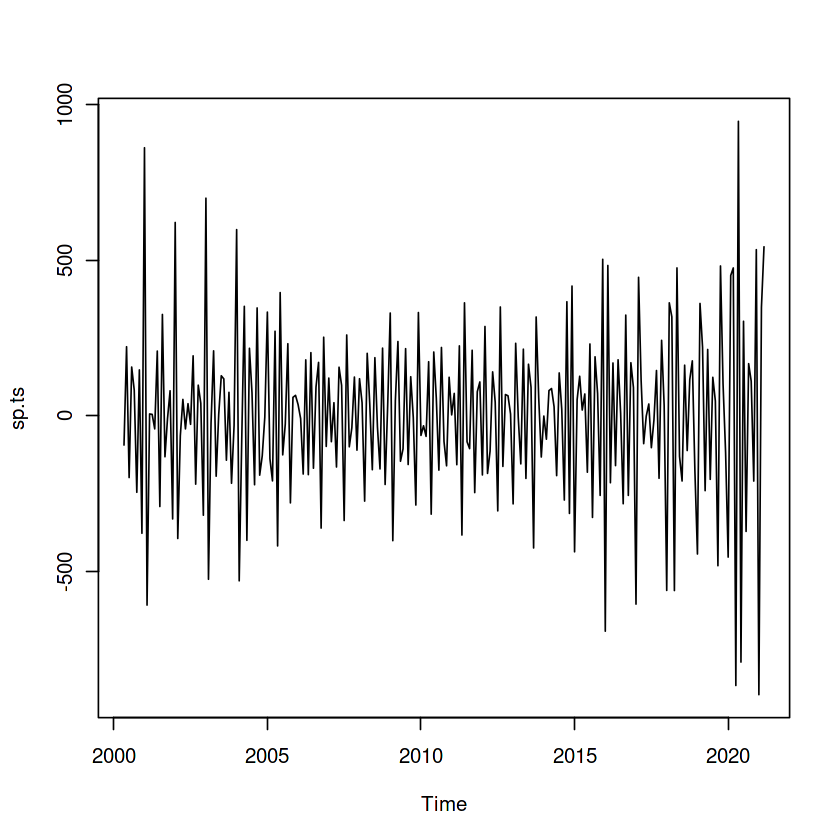

In [7]:
sp.tsAdjusted_With_diff <- diff(sp.tsAdjusted, differences=2)
plot.ts(sp.tsAdjusted_With_diff)

In [8]:
library(tseries)
adf.test(sp.tsAdjusted_With_diff, alternative="stationary")

Warning message in adf.test(sp.tsAdjusted_With_diff, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  sp.tsAdjusted_With_diff
Dickey-Fuller = -11.198, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


La p_value est 0.01<0.05 donc on accepte l'hypothèse alternative : les données différenciées sont stationnaire. 

On passe au Test de blancheur comme on a dit:

On teste si la nouvelle variable "sp.tsAdjusted_With_diff" est bien un bruit blanc ou pas (Si elle ne coresspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA). Pour ce faire, on peut procéder de deux façons différentes :

- Tracer l'acf et vérifier l'absence d'autocorrélation.

- Appliquer le test de Box-Pierce via la commande Box.test().


	Box-Pierce test

data:  sp.tsAdjusted_With_diff
X-squared = 102.76, df = 1, p-value < 2.2e-16


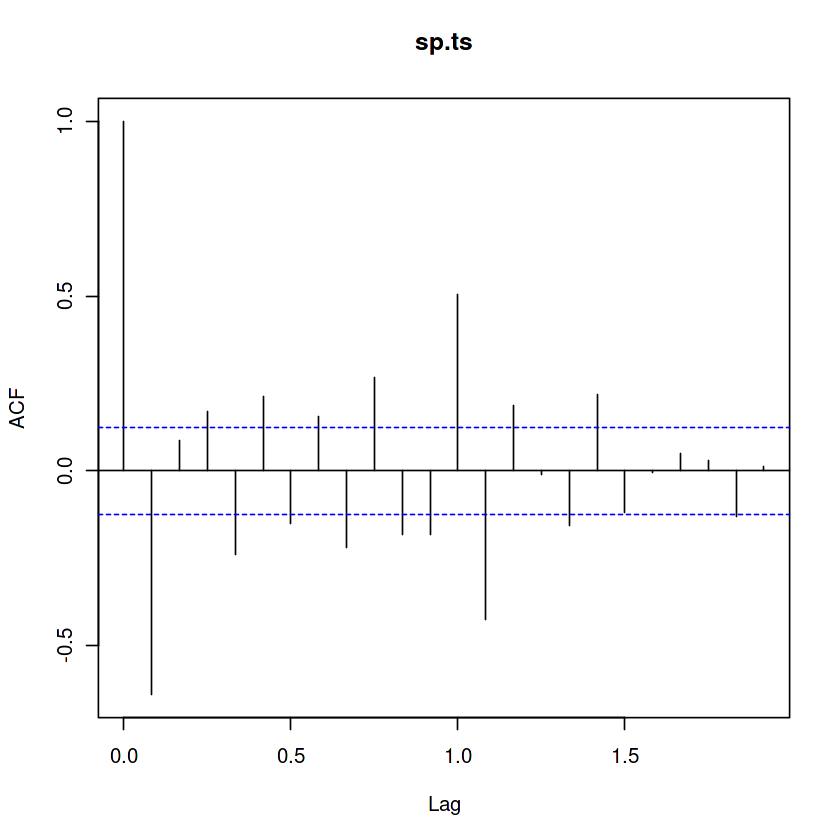

In [9]:
acf(sp.tsAdjusted_With_diff)
Box.test(sp.tsAdjusted_With_diff)

L'acf indique bien la présence d'autocorrélation et le test de Box-Pierce indique également à travers la valeurs de la p_value = 0.00000000000000022 < 0.05 que l'hypothèse alternative est considérée : le bruit n'est pas blanc.

Il faut passer maintenant à modéliser les données stationnaires résultatntes par un modèle ARMA.

### Etape 5: Application du modèle ARMA



Model ARIMA:   ARIMA( data, c(p,d,q))
avec: 
p = le point limite du PACF
q = le point limite de l'ACF
d = niveau de differentiation 

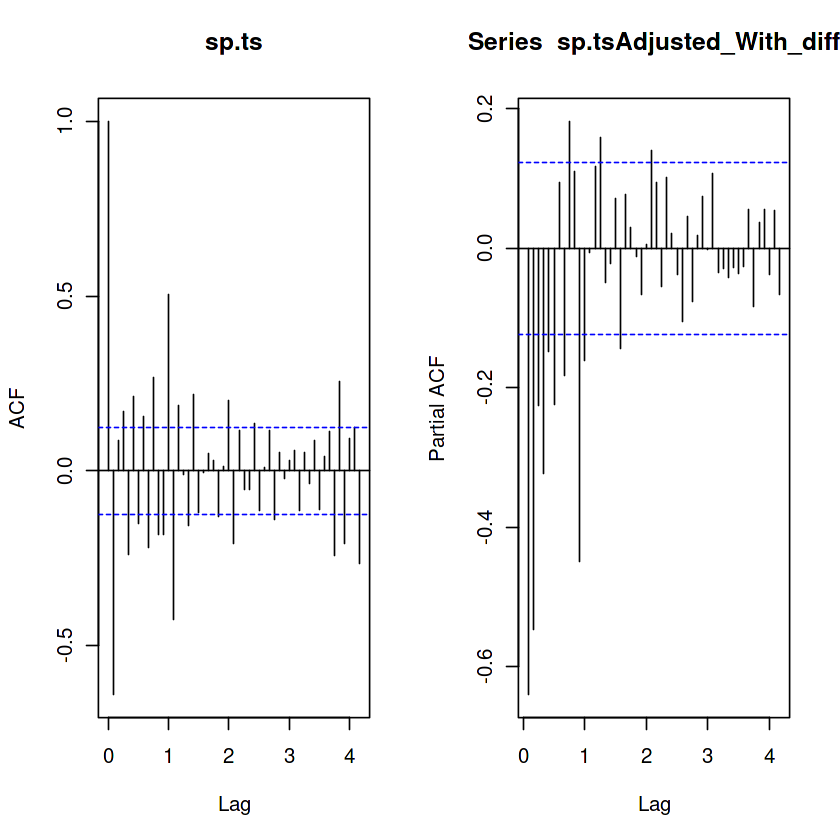

In [10]:
par(mfrow=c(1,2))
acf(sp.tsAdjusted_With_diff,50)
pacf(sp.tsAdjusted_With_diff,50)

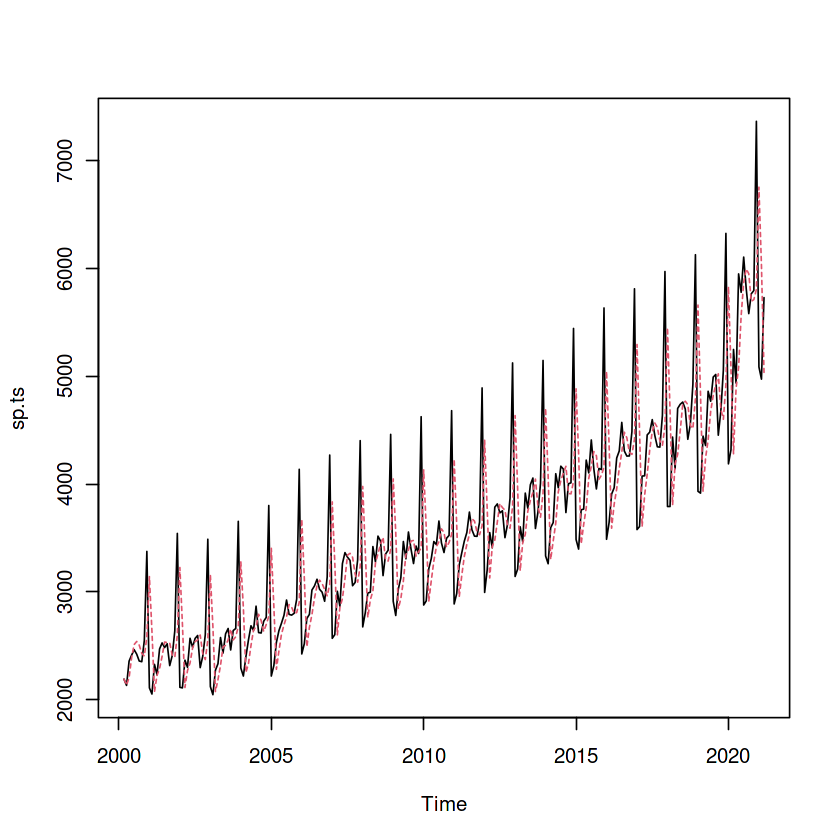

In [14]:
res <- arima(sp.ts, order = c(1,2,1))
ts.plot(sp.ts)
res_with_o_residual <- sp.ts - residuals(res)
points(res_with_o_residual, type = "l", col = 2, lty = 2)

Après avoir formé le modèle, nous ferons une prédiction de 5 mois via la commande forecast() de la librairie "forecast"

In [12]:
library("forecast")
res_Forcasted <- forecast(res, h=5)
res_Forcasted

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Apr 2021       5442.898 4657.567 6228.228 4241.838 6643.957
May 2021       5577.664 4662.015 6493.312 4177.301 6978.027
Jun 2021       5541.811 4446.480 6637.141 3866.647 7216.974
Jul 2021       5574.962 4348.628 6801.297 3699.446 7450.479
Aug 2021       5580.206 4225.917 6934.495 3509.000 7651.413